### Importação dos dados



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

df = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

df['Data da Compra'] = pd.to_datetime(df['Data da Compra'], dayfirst=True)

df.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,2022-05-03,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,2020-11-07,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#1. Análise do faturamento


In [23]:
faturamento_lojas = {}
faturamento_lojas['Loja 1'] = loja1['Preço'].sum()
faturamento_lojas['Loja 2'] = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

faturamento_lojas['Loja 3'] = faturamento_loja3
faturamento_lojas['Loja 4'] = faturamento_loja4

print("Faturamento total por loja:")
for nome, faturamento in faturamento_lojas.items():
    formatted_faturamento = f"{faturamento:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
    print(f"{nome}: R$ {formatted_faturamento}")

Faturamento total por loja:
Loja 1: R$ 1.534.509,12
Loja 2: R$ 1.488.459,06
Loja 3: R$ 1.464.025,03
Loja 4: R$ 1.384.497,58


# 2. Vendas por Categoria


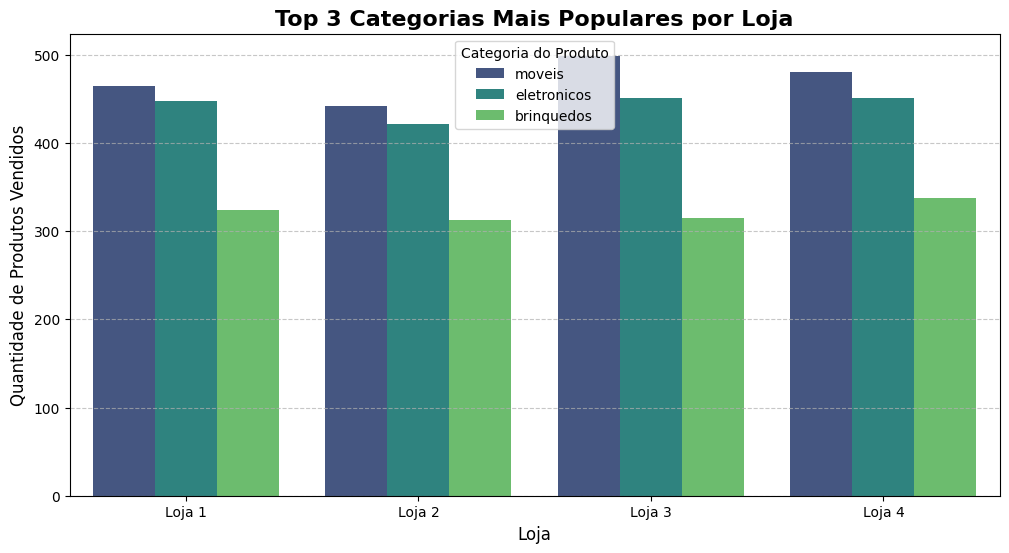

In [20]:

plot_data = []
for loja, categories in categorias_populares.items():
    for category, count in categories.items():
        plot_data.append({'Loja': loja, 'Categoria': category, 'Quantidade': count})

plot_df = pd.DataFrame(plot_data)


plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, x='Loja', y='Quantidade', hue='Categoria', palette='viridis')
plt.title('Top 3 Categorias Mais Populares por Loja', fontsize=16, loc='center', weight='bold')
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Quantidade de Produtos Vendidos', fontsize=12)
plt.legend(title='Categoria do Produto')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Média de Avaliação das Lojas

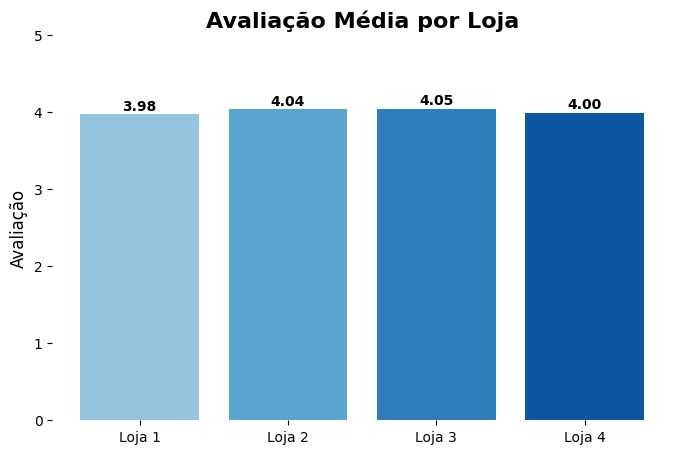

In [17]:
df_avaliacao = pd.DataFrame({
    "Loja": list(avaliacao_media_lojas.keys()),
    "Avaliação": list(avaliacao_media_lojas.values())
})

plt.figure(figsize=(8,5))
plt.bar(df_avaliacao["Loja"], df_avaliacao["Avaliação"], color=azuis)
plt.title("Avaliação Média por Loja", fontsize=16, loc="center", weight="bold")
plt.ylabel("Avaliação", fontsize=12)
plt.ylim(0, 5)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

for i, v in enumerate(df_avaliacao["Avaliação"]):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
def produtos_vendidos(df, top=3):
    mais_vendidos = df["Produto"].value_counts().head(top)
    menos_vendidos = df["Produto"].value_counts().tail(top)
    return mais_vendidos, menos_vendidos

print("\nProdutos mais e menos vendidos por loja:\n")

produtos_lojas = {}

for nome, df in lojas.items():
    mais, menos = produtos_vendidos(df)
    produtos_lojas[nome] = {"mais_vendidos": mais, "menos_vendidos": menos}
    print(f"{nome} - Mais vendidos:\n{mais}\n")
    print(f"{nome} - Menos vendidos:\n{menos}\n")



Produtos mais e menos vendidos por loja:

Loja 1 - Mais vendidos:
Produto
Micro-ondas      60
TV Led UHD 4K    60
Guarda roupas    60
Name: count, dtype: int64

Loja 1 - Menos vendidos:
Produto
Panela de pressão    35
Headset              33
Celular ABXY         33
Name: count, dtype: int64

Loja 2 - Mais vendidos:
Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Name: count, dtype: int64

Loja 2 - Menos vendidos:
Produto
Mesa de jantar       34
Impressora           34
Jogo de tabuleiro    32
Name: count, dtype: int64

Loja 3 - Mais vendidos:
Produto
Kit banquetas     57
Mesa de jantar    56
Cama king         56
Name: count, dtype: int64

Loja 3 - Menos vendidos:
Produto
Mochila             36
Micro-ondas         36
Blocos de montar    35
Name: count, dtype: int64

Loja 4 - Mais vendidos:
Produto
Cama box                   62
Faqueiro                   59
Dashboards com Power BI    56
Name: count, dtype: int64

Loja 4 - Menos vendido

# 5. Frete Médio por Loja


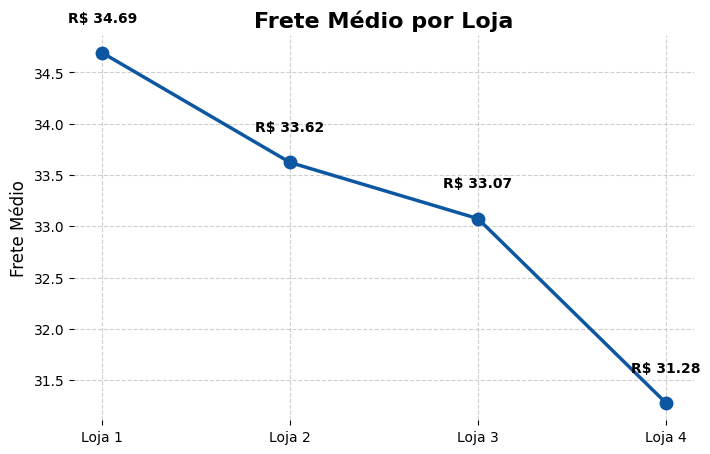

In [ ]:
df_frete = pd.DataFrame({
    "Loja": list(frete_medio_lojas.keys()),
    "Frete médio": list(frete_medio_lojas.values())
})

plt.figure(figsize=(8,5))
plt.plot(df_frete["Loja"], df_frete["Frete médio"],
         marker='o', linestyle='-', color=azuis[-1], linewidth=2.5, markersize=9)

plt.title("Frete Médio por Loja", fontsize=16, loc="center", weight="bold")
plt.ylabel("Frete Médio", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

for i, v in enumerate(df_frete["Frete médio"]):
    plt.text(i, v + 0.3, f"R$ {v:.2f}", ha='center', fontweight='bold')

plt.show()

# Relatório

# **Desempenho das Lojas**

Com base nas análises, observei:

## 1. Faturamento Total
- Loja 1: R$ 1.534.509,12

- Loja 2: R$ 1.488.459,06

- Loja 3: R$ 1.464.025,03

- Loja 4: R$ 1.384.497,58

*Observação: A Loja 4 apresenta o menor faturamento total, sendo candidata à venda.*

## 2. Categorias Mais Populares
- Todas as lojas vendem principalmente **móveis, eletrônicos e brinquedos**.
- A distribuição é similar, não sendo um fator decisivo.

## 3. Avaliação Média
- Loja 3: 4,05
- Loja 2: 4,04
- Loja 4: 4,00
- Loja 1: 3,98

*Observação: As avaliações são relativamente próximas: Loja 1 tem a menor média, mas o impacto é pequeno.*

## 4. Produtos Mais e Menos Vendidos
- Mais vendidos por loja variam entre eletrodomésticos e móveis.
- Menos vendidos não indicam grande diferença estratégica entre lojas.

## 5. Frete Médio
- Loja 4: R$ 31,28 (menor frete médio)

- Loja 1: R$ 34,69 (maior frete médio)

*Observação: Frete mais baixo pode indicar maior competitividade, mas a diferença não é suficiente para superar o baixo faturamento.*


## Conclusão
Considerando **faturamento, avaliações, vendas e frete**, a **Loja 4** apresenta o **menor desempenho global**.

Recomendamos que o Sr. João venda a **Loja 4** para investir em um novo negócio.